![dance party](dance_party.jpg)

# Which songs are most suitable for a dancing party?

## 📖 Background
It's that vibrant time of year again - Summer has arrived (for those of us in the Northern Hemisphere at least)! There's an energy in the air that inspires us to get up and move. In sync with this exuberance, your company has decided to host a dance party to celebrate. And you, with your unique blend of creativity and analytical expertise, have been entrusted with the crucial task of curating a dance-themed playlist that will set the perfect mood for this electrifying night. The question then arises - How can you identify the songs that would make the attendees dance their hearts out? This is where your coding skills come into play.

## 💾 The Data
You have assembled information on more than `125` genres of Spotify music tracks in a file called `spotify.csv`, with each genre containing approximately `1000` tracks. All tracks, from all time, have been taken into account without any time period limitations. However, the data collection was concluded in `October 2022`.
Each row represents a track that has some audio features associated with it.

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|

[Source](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset) (data has been modified)

## 💪 Challenge
Your task is to devise an analytically-backed, dance-themed playlist for the company's summer party. Your choices must be justified with a comprehensive report explaining your methodology and reasoning. Below are some suggestions on how you might want to start curating the playlist:
* Use descriptive statistics and data visualization techniques to explore the audio features and understand their relationships.
* Develop and apply a machine learning model that predicts a song's `danceability`. 
* Interpret the model outcomes and utilize your data-driven insights to curate your ultimate dance party playlist of the top 50 songs according to your model.

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                            |
|---------|----------|---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul>|
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul>|
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [103]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import catboost as cb
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn import model_selection
from sklearn.preprocessing import scale
from sklearn.model_selection import RepeatedKFold

## Data wrangling and exploratory analysis

In [104]:
spotify = pd.read_csv('../workspace/data/spotify.csv')
spotify.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [105]:
spotify.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms         float64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [106]:
spotify.nunique()

track_id            88895
artists             31267
album_name          46325
track_name          72935
popularity            101
duration_ms         50278
explicit                2
danceability         1169
energy               2064
key                    12
loudness            19292
mode                    2
speechiness          1483
acousticness         5053
instrumentalness     5345
liveness             1721
valence              1779
tempo               45242
time_signature          4
track_genre           114
dtype: int64

In [107]:
spotify.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [108]:
# Dataset has 3 nulls. We remove them so there is no problem with the further model.
spotify_data=spotify.dropna()

In [109]:
#We remove object data that we will not use for the model.
spotify.drop(columns=["track_id","artists", "album_name","track_name"], inplace=True)

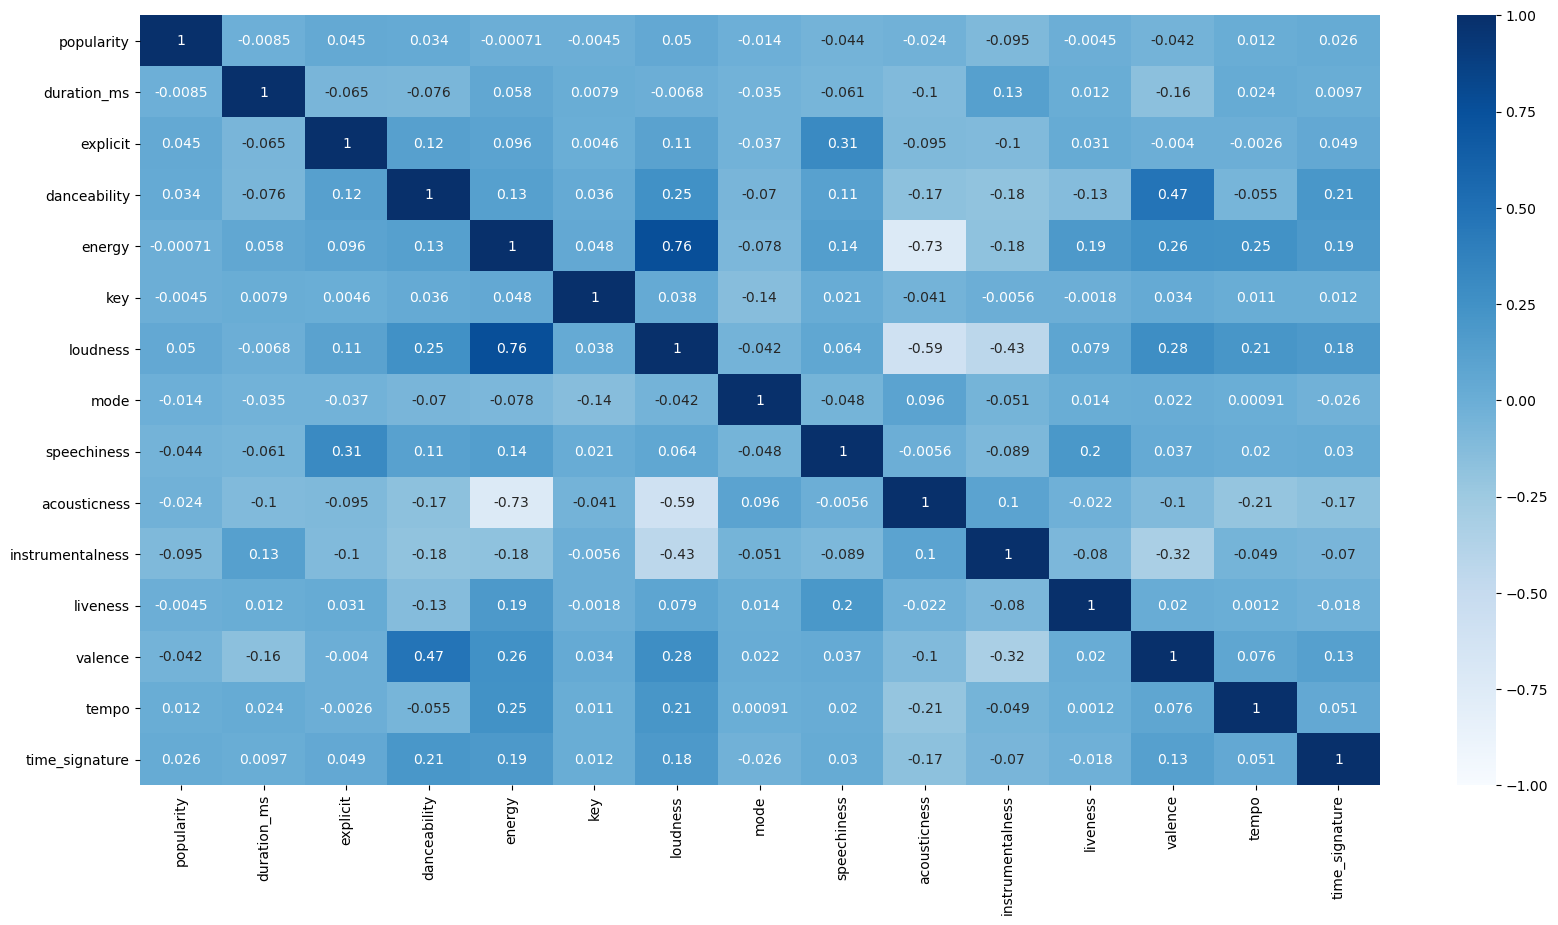

In [110]:
# One variable (valence) has important correlation with target variable (danceability). 
plt.figure(figsize=(20,10))
sns.heatmap(spotify.corr(), annot=True, vmin=-1, cmap='Blues');

c:\Users\Dell\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Dell\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Dell\anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

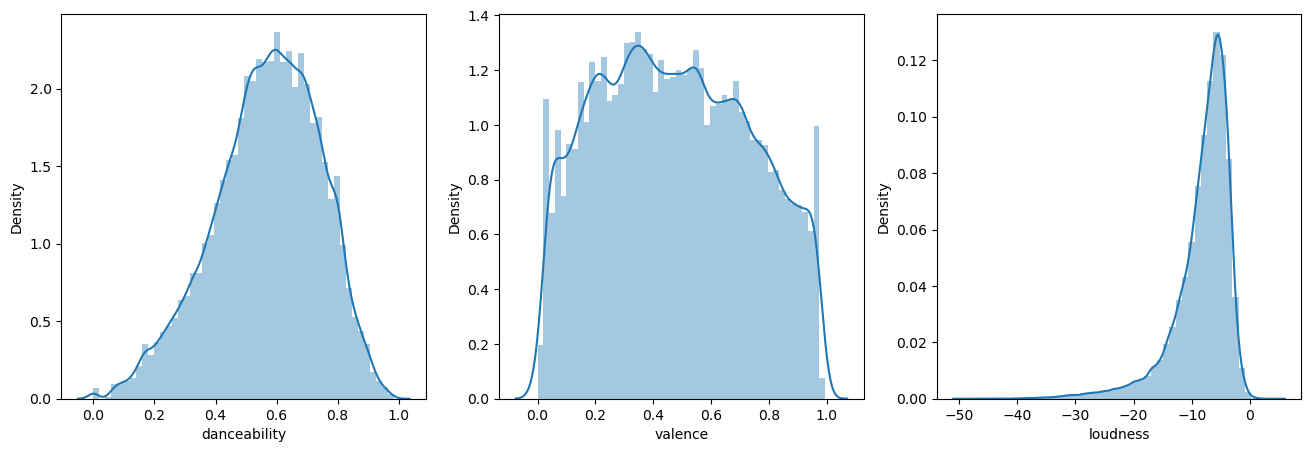

In [111]:
# Target variable is closed to be a left-skewed distribution
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(spotify['danceability'])
plt.subplot(1,3,2)
sns.distplot(spotify['valence'])
plt.subplot(1,3,3)
sns.distplot(spotify['loudness'])
plt.show()


In [112]:
#We define a function to romeove outliers from our dataset
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [113]:
# We remove outliers using STD criteria.
spotify_no_outliers=remove_outliers(spotify,["danceability", "popularity", "duration_ms", "valence", "tempo", "energy", "speechiness", "acousticness", "liveness", "time_signature", "instrumentalness"],3)

Working on column: danceability
Working on column: popularity
Working on column: duration_ms
Working on column: valence
Working on column: tempo
Working on column: energy
Working on column: speechiness
Working on column: acousticness
Working on column: liveness
Working on column: time_signature
Working on column: instrumentalness


In [114]:
# We have to transform "Key" column type into an "object"
spotify_no_outliers['key'] = spotify_no_outliers['key'].astype('object')

In [115]:
# Transforming categorical data into dummies
categorical= ["explicit", "track_genre", "key"]
quantitative=spotify_no_outliers.drop(columns=categorical)
x=spotify_no_outliers[categorical]
dummies=pd.get_dummies(x, drop_first = True, dtype=float)
spotify_final =  quantitative.join(dummies)

In [116]:
spotify_final.head(5)

,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,73,230666.0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55,149610.0,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,57,210826.0,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71,201933.0,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82,198853.0,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train-Test

In [167]:
X=spotify_final.drop(columns="danceability")
y=spotify_final["danceability"]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

## Standarization

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

## 1° model: RIDGE REGRESSION

In [119]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=np.logspace(-5, 5, 100))
ridge_cv.fit(X_train, y_train)
predictions = ridge_cv.predict(X_test)


In [120]:
ridge_rmse=metrics.mean_squared_error(y_test, predictions)
ridge_r2=metrics.r2_score (y_test, predictions)

# Regression Tree

In [121]:
tree = DecisionTreeRegressor(random_state=43)

params_tree = {'max_depth':[10,15, 20, 25, 30, 35],
          'min_samples_leaf':[15,20, 25, 30],
          "criterion": ["mse"],
          'min_samples_split':[1,2,3,4,5,6]}

In [122]:
rs_tree = RandomizedSearchCV(estimator=tree,param_distributions=params_tree,cv=5,n_jobs=-1)

In [123]:
rs_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=43),
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': [10, 15, 20, 25, 30, 35],
                                        'min_samples_leaf': [15, 20, 25, 30],
                                        'min_samples_split': [1, 2, 3, 4, 5,
                                                              6]})

In [124]:
best_params = rs_tree.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 25, 'max_depth': 25, 'criterion': 'mse'}


In [125]:
predicted_y = rs_tree.predict(X_test)

In [126]:
r2_tree=metrics.r2_score(y_test, predicted_y)
rmse_tree=metrics.mean_squared_error(y_test, predicted_y)

# XGBoost

In [127]:
xgb_model = xgb.XGBRegressor(random_state=5)

params_xb = {
    'n_estimators':[1000],
    'min_child_weight':[4,5], 
    'gamma':[i/10.0 for i in range(3,6)],  
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)], 
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=params_xb,
                                   n_iter=3, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)

In [128]:
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   n_iter=3, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gbli

In [129]:
best_regressor_xb = random_search.best_estimator_
xgb_model_best = xgb.XGBRegressor(params=best_regressor_xb)
xgb_model_best.fit(X_train_scaled, y_train)

[12:08:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "params" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshol...
                                 gamma=0.4, gpu_id=None, grow_policy=None,
                                 importance_type=None,
                                 interaction_constraints=None,
                                 learning_rate=None, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=6,
                                 max_leaves=None, min_child_weight=5,
                                 missing=nan, monotone_constraints=None,


In [130]:
y_pred_xgb=xgb_model_best.predict(X_test_scaled)
mae_pred_xgb = mean_absolute_error(y_test, y_pred_xgb)
xgboost_rmse=np.sqrt(mae_pred_xgb)
xgboost_r2=metrics.r2_score(y_test, y_pred_xgb)


In [131]:
y_pred_xgb

array([0.43759528, 0.5526303 , 0.71367264, ..., 0.54517925, 0.5506649 ,
       0.7645369 ], dtype=float32)

## CATBOOST

In [132]:
model_cb = cb.CatBoostRegressor()
rs_cb = {'depth': [6,8,10], "learning_rate": [0.01, 0.05, 0.1], 'iterations':[30, 50, 100]}
rs_catboost= RandomizedSearchCV(estimator = model_cb, param_distributions= rs_cb, scoring ='r2', cv = 2, n_jobs=-1)
rs_catboost.fit(X_train_scaled, y_train)


0:	learn: 0.1650488	total: 13.9ms	remaining: 1.38s
1:	learn: 0.1599536	total: 38.5ms	remaining: 1.89s
2:	learn: 0.1552494	total: 57.2ms	remaining: 1.85s
3:	learn: 0.1514304	total: 71.1ms	remaining: 1.71s
4:	learn: 0.1478090	total: 84.1ms	remaining: 1.6s
5:	learn: 0.1449183	total: 95.8ms	remaining: 1.5s
6:	learn: 0.1423632	total: 108ms	remaining: 1.44s
7:	learn: 0.1398727	total: 125ms	remaining: 1.43s
8:	learn: 0.1376175	total: 138ms	remaining: 1.39s
9:	learn: 0.1355871	total: 153ms	remaining: 1.37s
10:	learn: 0.1336159	total: 164ms	remaining: 1.33s
11:	learn: 0.1321321	total: 175ms	remaining: 1.28s
12:	learn: 0.1308234	total: 187ms	remaining: 1.25s
13:	learn: 0.1294214	total: 199ms	remaining: 1.22s
14:	learn: 0.1281530	total: 212ms	remaining: 1.2s
15:	learn: 0.1270940	total: 227ms	remaining: 1.19s
16:	learn: 0.1259114	total: 240ms	remaining: 1.17s
17:	learn: 0.1250039	total: 254ms	remaining: 1.16s
18:	learn: 0.1240129	total: 272ms	remaining: 1.16s
19:	learn: 0.1232759	total: 288ms	rema

RandomizedSearchCV(cv=2,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001E80984E3D0>,
                   n_jobs=-1,
                   param_distributions={'depth': [6, 8, 10],
                                        'iterations': [30, 50, 100],
                                        'learning_rate': [0.01, 0.05, 0.1]},
                   scoring='r2')

In [133]:
rs_catboost.best_estimator_

In [134]:
cat_boost_predict=rs_catboost.predict(X_test_scaled)
cb_r2=metrics.r2_score(y_test, cat_boost_predict)
cb_rmse=metrics.mean_squared_error(y_test, cat_boost_predict)

## LGBM

In [135]:
params_lgbm = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}



rs_lgbm = RandomizedSearchCV(lgb.LGBMRegressor(random_state=5), params_lgbm, scoring='r2', cv=5, n_iter=3, iid=False, n_jobs=-1)


rs_lgbm.fit(X_train_scaled, y_train)

c:\Users\Dell\anaconda3\envs\dhdsblend2021\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=5), iid=False,
                   n_iter=3, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.03, 0.003],
                                        'max_depth': [-1, 3, 5],
                                        'n_estimators': [50, 100, 200, 500],
                                        'num_leaves': [7, 14, 21, 28, 31, 50]},
                   scoring='r2')

In [136]:
y_pred_lgb = rs_lgbm.predict(X_test_scaled)
lgbm_r2=metrics.r2_score(y_test, y_pred_lgb)
lgbm_rmse=metrics.mean_squared_error(y_test, y_pred_lgb)

## Evaluating results

In [148]:
variables = {
    "model": ["ridge", "regression_tree", "XG_Boost", "catboost", "LGBM"],
    "r2": [ridge_r2, r2_tree, xgboost_r2, cb_r2, lgbm_r2],
    "rmse": [ridge_rmse, rmse_tree,xgboost_rmse,cb_rmse, lgbm_rmse],
    "mae": [ridge_rmse**2, rmse_tree**2,xgboost_rmse**2,cb_rmse**2, lgbm_rmse**2]
}

df_models = pd.DataFrame(variables)

df_models.sort_values(by=['r2'], ascending=False)

,model,r2,rmse,mae
2,XG_Boost,0.694770,0.270415,0.073124
4,LGBM,0.668027,0.009716,0.000094
3,catboost,0.620080,0.011119,0.000124
1,regression_tree,0.563613,0.012772,0.000163
0,ridge,0.550735,0.013149,0.000173


In [149]:
print("Althoug it has the higher RMSE, XGBoost explains better the target value (r2)")

Althoug it has the higher RMSE, XGBoost explains better the target value (r2)


## Feature selection of Random Search XGBOOST

Text(0, 0.5, 'Feature Importance Score')

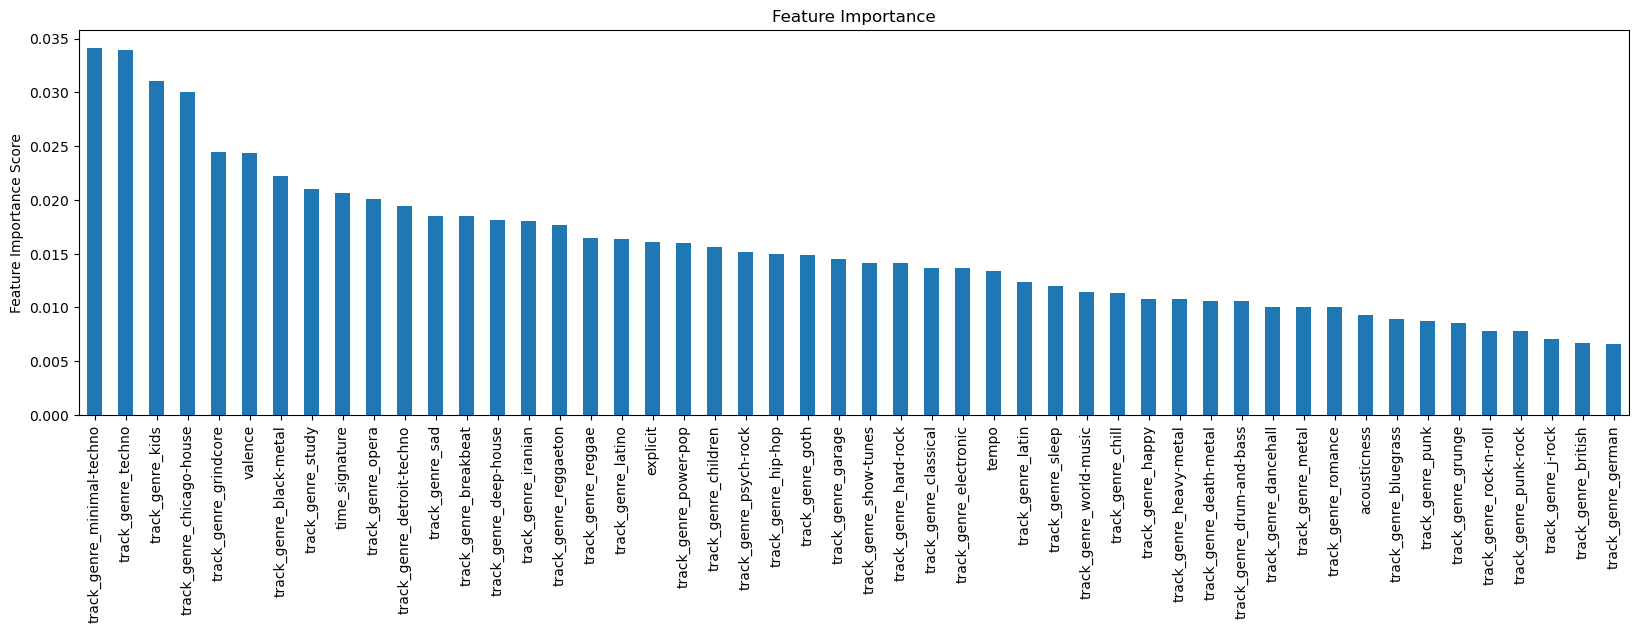

In [150]:
#Feature importance for top 50 predictors
predictors = [x for x in X_train.columns]
feat_imp = pd.Series(xgb_model_best.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:50]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score')

<AxesSubplot:ylabel='Frequency'>

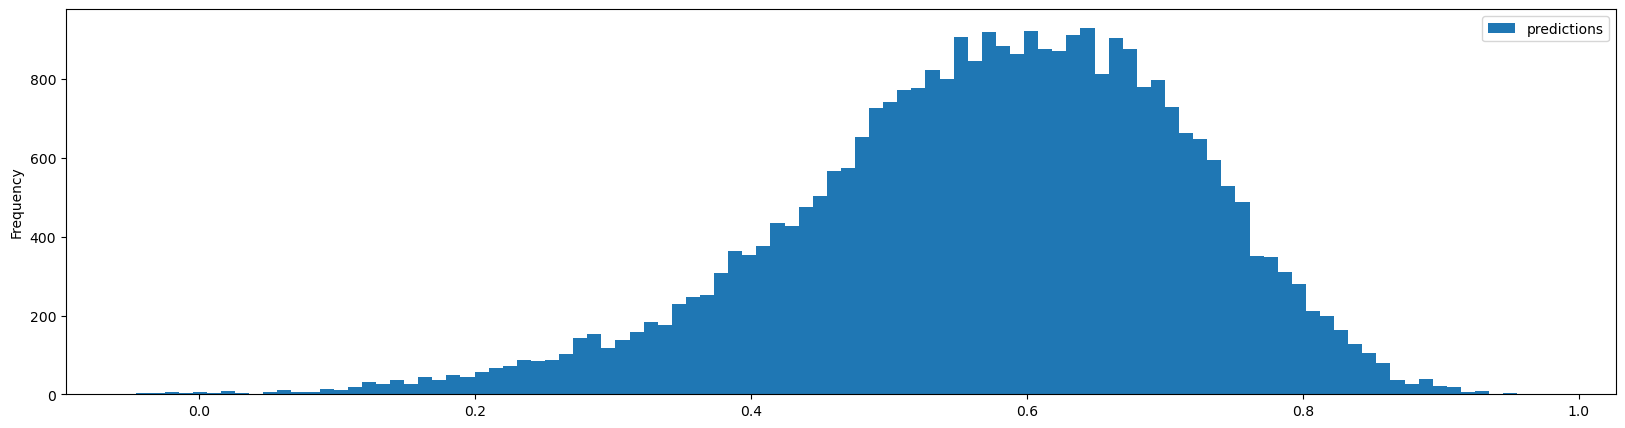

In [141]:
predictions_xgboost = pd.DataFrame(y_pred_xgb, columns=['predictions'])
predictions_xgboost.plot.hist(bins=100)

In [151]:
#Mean danceability prediction is 0.57

predictions_xgboost.describe()

,predictions
count,31527.000000
mean,0.573567
std,0.142444
min,-0.045365
25%,0.487357
50%,0.585241
75%,0.676147
max,0.975887


## Prediction of top 50 of most danceable songs

In [168]:
model_pkl_file = "xgboost_model_spotify.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(xgb_model_best, file)

In [169]:
pickled_model = pickle.load(open('xgboost_model_spotify.pkl', 'rb'))
pickled_model.predict(X)

array([0.757761  , 0.62556654, 0.4974381 , ..., 0.60921323, 0.50914454,
       0.5643929 ], dtype=float32)

In [170]:
X["new_prediction"]=pickled_model.predict(X)
X_sorted = X.sort_values(by="new_prediction", ascending=False)

In [172]:
X_sorted.head(50)

,popularity,duration_ms,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,new_prediction
14142,60,110846.0,0.257,-10.953,1,0.0981,0.325000,0.000000,0.0930,0.954,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.972703
14066,62,75028.0,0.386,-13.189,1,0.0511,0.234000,0.002360,0.1070,0.969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.962678
66083,10,216373.0,0.527,-4.672,0,0.0913,0.015300,0.000000,0.0895,0.922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.962410
14390,21,36432.0,0.305,-7.462,1,0.0558,0.236000,0.000000,0.0879,0.851,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.960292
65996,9,299333.0,0.430,-11.656,0,0.0451,0.007610,0.833000,0.0693,0.977,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.956580
66236,9,132173.0,0.468,-8.738,0,0.2570,0.005550,0.098500,0.1230,0.532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.951741
37352,4,180922.0,0.807,-0.090,0,0.2420,0.365000,0.000000,0.0577,0.877,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949869
66124,21,108388.0,0.366,-6.422,1,0.0763,0.408000,0.000010,0.1060,0.838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948065
14362,53,95226.0,0.394,-10.276,1,0.0691,0.416000,0.000000,0.0458,0.959,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.945131
66031,10,123376.0,0.336,-19.046,1,0.2600,0.023300,0.000011,0.0788,0.922,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.940718
